# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Nisrina Fatimah Parisya
- **Email:** mc006d5x1393@student.devacademy.id
- **ID Dicoding:** MC006D5X1393

## Menentukan Pertanyaan Bisnis


- Apa saja kategori produk yang dijual di Olist dan diminati konsumen dalam 3 tahun terakhir (2016-2018)
- Buatlah analisis Pola Waktu Pembelian konsumen mengenai waktu berbelanja mereka, Apakah ada pola pembelian yang berbeda antara hari bekerja dan hari libur?

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:00<00:00, 50.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d 'olistbr/brazilian-ecommerce'

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 75% 32.0M/42.6M [00:00<00:00, 112MB/s] 
100% 42.6M/42.6M [00:00<00:00, 102MB/s]


In [ ]:
import zipfile

In [11]:
dataset_zip = zipfile.ZipFile('brazilian-ecommerce.zip', 'r') # Treat the filename as a string

dataset_zip.extractall() # Correct the function name to 'extractall'

dataset_zip.close()

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

## Data Wrangling

### Gathering Data

In [15]:
pesanan_df = pd.read_csv("olist_orders_dataset.csv")
pesanan_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
barangDibeli_df = pd.read_csv("olist_order_items_dataset.csv")
barangDibeli_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
produk_df = pd.read_csv("olist_products_dataset.csv")
produk_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
proCa_df = pd.read_csv("product_category_name_translation.csv")
proCa_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
customer_df = pd.read_csv("olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
pay_df = pd.read_csv("olist_order_payments_dataset.csv")
pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Pada kode diatas saya memasukkan terlebih dahulu data apa saja yang ingin diolah dan dianalisis, untuk pertanyaan nomor 1 saya menggunakan beberapa dataset diantaranya order_dataset, products_dataset, product_category_name dan order_item_dataset.
- untuk pertanyaan nomor 2 saya menggunakan dataset berupa customers_dataset, products_dataset, order_dataset dan order_payments_dataset.

### Assessing Data

CEK MISSING VALUES

In [21]:
missval_orderItem = barangDibeli_df.isnull().sum()
missval_order = pesanan_df.isnull().sum()
missval_product = produk_df.isnull().sum()
missval_proCa = proCa_df.isnull().sum()
missval_cust= customer_df.isnull().sum()
missval_pay = pay_df.isnull().sum()

print("Missing values in Order:\n", missval_order)
print("Missing values in Order_item:\n", missval_orderItem)
print("Missing values in Product:\n", missval_product)
print("Missing values in product_Category:\n", missval_proCa)
print("Missing values in Customer:\n", missval_cust)
print("Missing values in Order_Payments:\n", missval_pay)


Missing values in Order:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Missing values in Order_item:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in Product:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Missing values in product_Category:
 product_category_name            0
product_category_na

**Insight:**
- Untuk melakukan normalisasi data, disini saya menghitung missing values (nilai yang hilang) untuk proses preparation data.

CEK DATA DUPLIKAT

In [22]:
dpOrderItem_count = barangDibeli_df.duplicated().sum()
dpProduct_count = produk_df.duplicated().sum()
dpOrder_count = pesanan_df.duplicated().sum()
dpOrderCategory_count = proCa_df.duplicated().sum()
dpCustomer_order = customer_df.duplicated().sum()
dpPay_count = pay_df.duplicated().sum()

print("Duplicated values in Order_item:", dpOrderItem_count)
print("Duplicated values in Product:", dpProduct_count)
print("Duplicated values in Order:", dpOrder_count)
print("Duplicated values in product_Category:", dpOrderCategory_count)
print("Duplicated values in Customer:", dpCustomer_order)
print("Duplicated values in Order_Payments:", dpPay_count)

Duplicated values in Order_item: 0
Duplicated values in Product: 0
Duplicated values in Order: 0
Duplicated values in product_Category: 0
Duplicated values in Customer: 0
Duplicated values in Order_Payments: 0


Insight
- Pada tahapan ini saya melakukan pemeriksaan duplikasi data untuk menghindari adanya redudansi data dalam meningkatkan kualitas data

### Cleaning Data

HAPUS BARIS YANG MASIH ADA MISSING VALUES DAN ISI DENGAN MEAN

In [23]:
# menghapus sisa missing value pada dataset

def fill_missing_with_mean(df):
    for col in df.select_dtypes(include=np.number):
        df[col] = df[col].fillna(df[col].mean())

    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

produk_df = fill_missing_with_mean(produk_df)
barangDibeli_df = fill_missing_with_mean(barangDibeli_df)
pesanan_df = fill_missing_with_mean(pesanan_df)
proCa_df = fill_missing_with_mean(proCa_df)
customer_df = fill_missing_with_mean(customer_df)
pay_df = fill_missing_with_mean(pay_df)

In [24]:

# untuk melihat apakah masih terdapat data dengan baris yang missing values
missval_orderItem = barangDibeli_df.isnull().sum()
missval_product = produk_df.isnull().sum()
missval_order = pesanan_df.isnull().sum()
missval_proCa = proCa_df.isnull().sum()
missval_cust = customer_df.isnull().sum()
missval_pay= pay_df.isnull().sum()

print("Missing values in Order:\n", missval_order)
print("Missing values in Order_item:\n", missval_orderItem)
print("Missing values in Product:\n", missval_product)
print("Missing values in product_Category:\n", missval_proCa)
print("Missing values in Customer:\n", missval_cust)
print("Missing values in Order_Payments:\n", missval_pay)


Missing values in Order:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
Missing values in Order_item:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in Product:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Missing values in product_Category:
 product_category_name            0
product_category_name_english    0
dtype: int64
Missing value

**Insight:**
- mengisi missing value pada semua kolom dengan menempatkan nilai mean ada data. Hal ini saya lakukan untuk melakukan cleaning data lagi tanpa menghapus baris dengan nilai yang kosong

## Exploratory Data Analysis (EDA)

### PERTANYAAN NO 1. KATEGORI PRODUK YANG DIMINATI 3 TAHUN TERAKHIR

### Explore ...

In [25]:
# Gabungan data yang dibutuhkan
df = pd.merge(pesanan_df, barangDibeli_df, on='order_id', how='inner')
df = pd.merge(df, produk_df, on='product_id', how='inner')

#  kolom tanggal ke datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# data tahun 2016-2018
df = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Analisis 10 Kategori produk yang diminati
product_counts = df['product_id'].value_counts().head(10)

**Insight:**
- melakukan penggabungan dataframe uuntuk product, order_item dan order.
- Melakukan perubahan pada kolom order_purchace_timestamp di file order_dataaset dan merubahnya menjadi format datetime untuk bisa melakukan filtering data berdasarkan tahun 2016-2018
- melakukan frekuensi banyaknya produk dan mengambil 10 produk teratas dengan product_id

### PERTANYAAN NO. 2.
Buatlah analisis Pola Waktu Pembelian konsumen mengenai waktu berbelanja mereka, Apakah ada pola pembelian yang berbeda antara hari kerja dan hari libur?

In [26]:
# mengubah 'order_purchase_timestamp' menjadi datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['hour_of_day'] = df['order_purchase_timestamp'].dt.hour
df['month'] = df['order_purchase_timestamp'].dt.month

Insight
- Kode tersebut digunakan untuk mengubah kolom order_purchase_timestamp menjadi tipe data datetime untuk mengambil informasi hari,jam dan bulan. kode diatas digunakan untuk mempersiapkan analisis data dan dibuat menjadi visualisasi data untuk pengambilan kesimpulan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

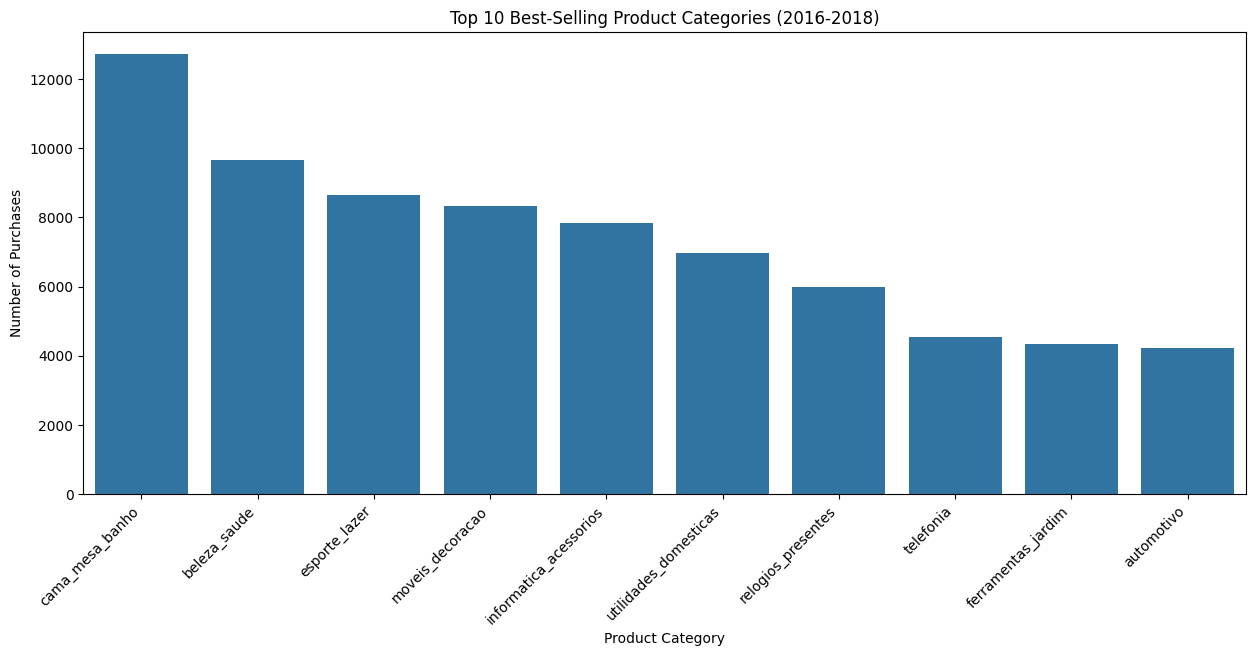

In [27]:
category_counts = df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Best-Selling Product Categories (2016-2018)')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
df = pd.merge(df, proCa_df, on='product_category_name', how='left')
df['product_category_name'] = df['product_category_name_english']
df.drop('product_category_name_english', axis=1, inplace=True)

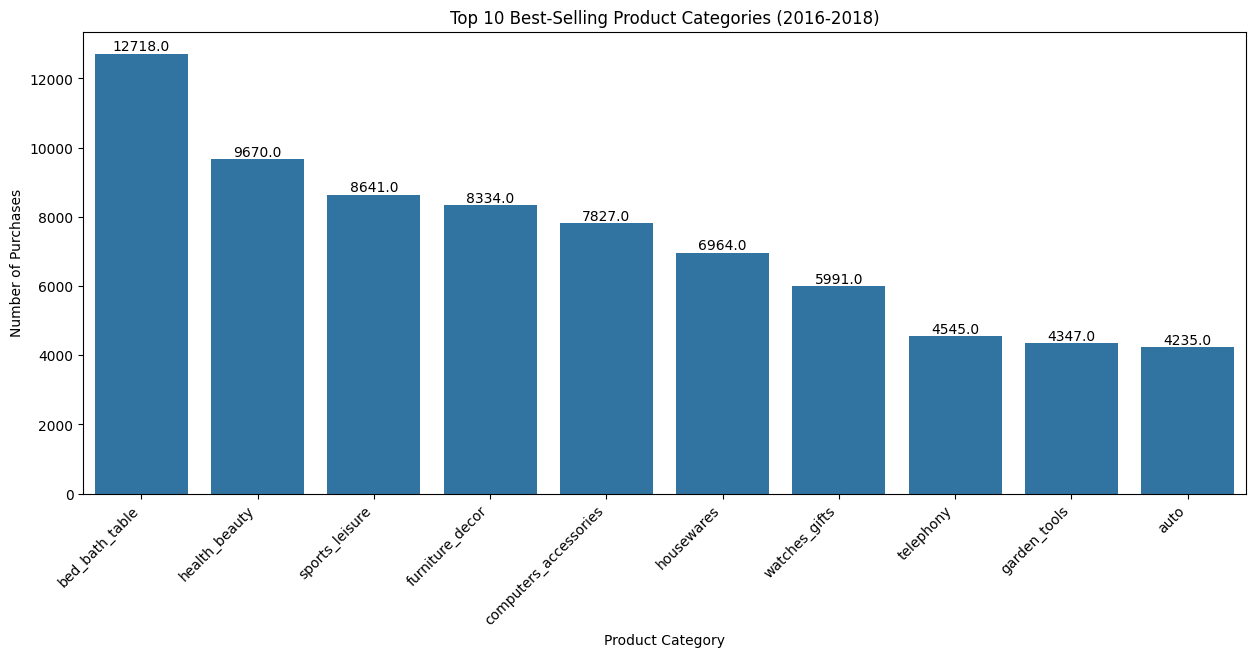

In [29]:
#run kode ini setelah menjalankan merge antara product_category_name dengan product_category_name_english
category_counts = df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Best-Selling Product Categories (2016-2018)')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')

# Add value annotations to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.show()

df = pd.merge(df, proCa_df, on='product_category_name', how='left')
df['product_category_name'] = df['product_category_name_english']
df.drop('product_category_name_english', axis=1, inplace=True)

Insight
- Mengubah nama kategori barang dibeli dari bahasa brazil ke bahasa inggris dengan menggubahnya ke kolom product_category_name_english.hal ini dilakukan dengan melakukan seleksi kondisi dengan adanya merge antara product_category_name dengan product_category_name_translation.
- membuat visualisasi data dengan ketentuan menghitung frekuensi kemunculan setiap kategori produk dalam kolom 'product_category_name' menggunakan value_counts() dan mengambil 10 kategori produk terlaris dengan perintah head(10)

### Pertanyaan 2:

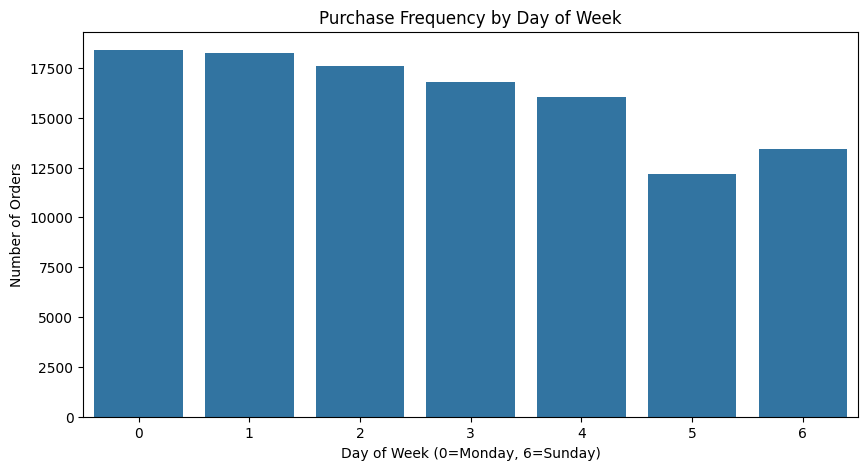

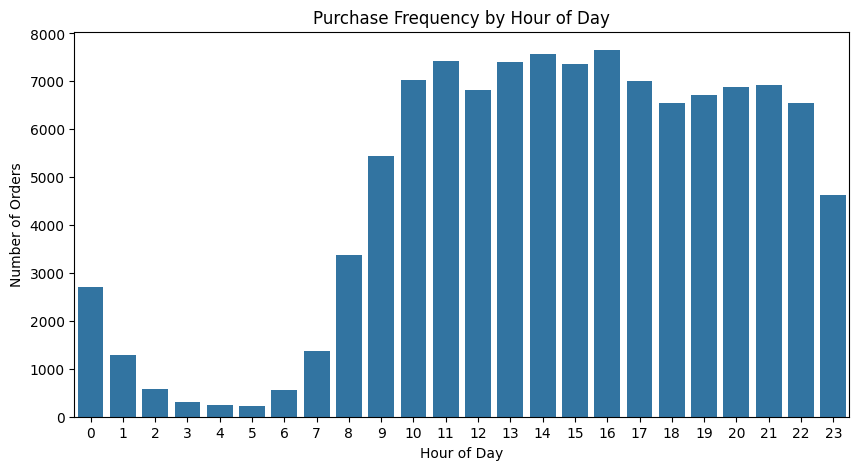

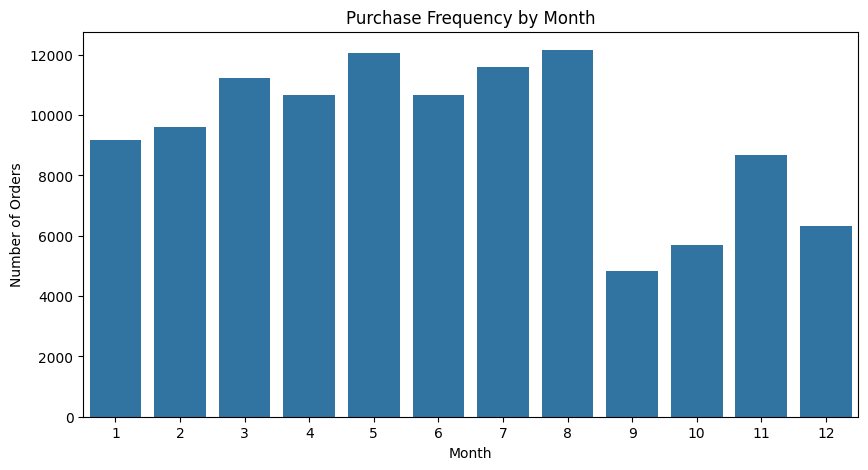

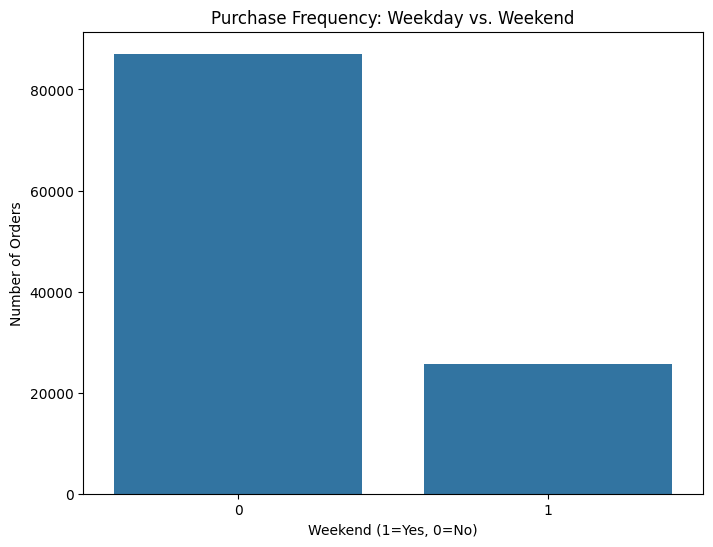

In [ ]:
# Analyze purchase patterns
# setiap hari dalam 1 minggu
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df)
plt.title('Purchase Frequency by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.show()

# setiap jam dalam 1 hari
plt.figure(figsize=(10, 5))
sns.countplot(x='hour_of_day', data=df)
plt.title('Purchase Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

# setiap bulan dalam 1 tahun
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df)
plt.title('Purchase Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

# perbedaan frekuensi pembelian produk oleh konsumen pada hari libur dan hari kerja
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # 5=Saturday, 6=Sunday

plt.figure(figsize=(8, 6))
sns.countplot(x='is_weekend', data=df)
plt.title('Purchase Frequency: Weekday vs. Weekend')
plt.xlabel('Weekend (1=Yes, 0=No)')
plt.ylabel('Number of Orders')
plt.show()


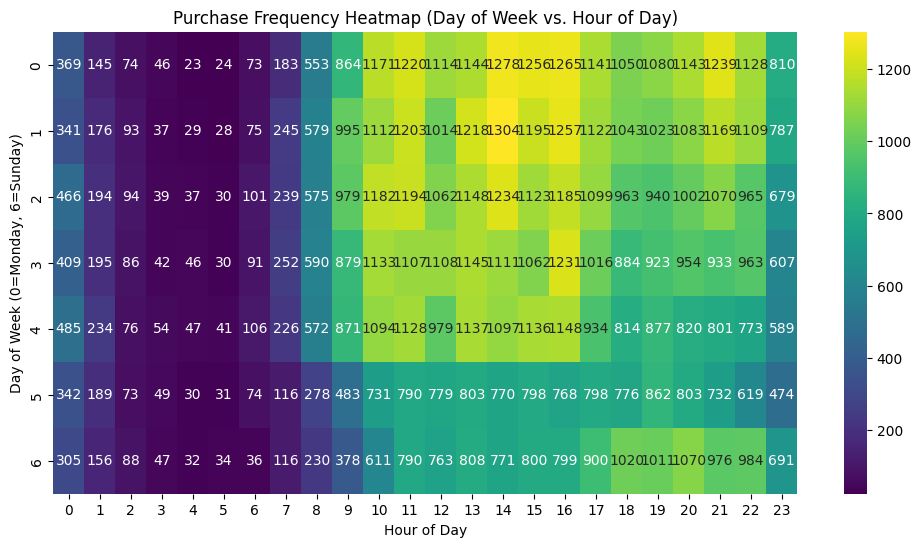

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek
df['hour_of_day'] = df['order_purchase_timestamp'].dt.hour

heatmap_data = df.pivot_table(index='day_of_week', columns='hour_of_day', values='order_id', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Purchase Frequency Heatmap (Day of Week vs. Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()


**Insight:**
- Membuat visualisasi data dengan bar chart dan heatmap masing masing kategori sehingga dapat melihat frekuensi berbelanja konsumen berdasarkan waktu waktu tertentu untuk menarik kesimpulan

## Conclusion

**- Conclution pertanyaan 1**

Secara garis besar, hasil pola yang didapatkan pada grafik visualisasi data yang didapatkan, dalam periode 3 tahun terakhir (2O16 - 2018) Olist Store milik Brazil memiliki beberapa kategori produk yang sering dibeli dan diminati oleh konsumen mereka diantaranya

1. pada tabel bed_bath_table yang merupakan kategori perabotan untuk ruangan di rumah, pada grafik dapat kita lihat bahwa terdapat kurang lebih dari 12718 lebih pembelian yang menunjukkan tingginya minat konsumen pada barang barang khusus untuk di kamar tidur dan kamar mandi selama 3 tahun terakhir

2. pada tabel health_beauty kita dapat melihat bahwa jumlah pembelian produk terdapat pada kisaran kurang lebih 9670  pembelian oleh konsumen dimana hal ini menunjukkan ketertarikan tinggi pada kategori produk kecantikan dan perawatan diri oleh konsumen

3. sport_leisure (peralatan olahraga) menempati posisi ketiga dengan pembelian kategori produk tersebut sebanyak 8641 lebih pembelian

4. Furniture_decor (Furnitur dan dekorasi)menempati posisi keempat dengan pembelian kategori produk tersebut sebanyak kurang lebih 8334 pembelian

5. computers_accessories melengkapi lima besar dengan sekitar pembelian 7827 kategori produk tersebut, dimana hal ini menunjukkan permintaan yang konsisten untuk produk elektronik atau aksesoris komputer.

6. Kategori "housewares", "watches_gifts", "telephony", "garden_tools", dan "auto" menempati posisi 6-10 dengan jumlah pembelian yang menurun secara bertahap dari sekitar 6900 hingga 4000 pembelian.

Dari visualisasi data tersebut dapat kita lihat bahwa tingginya minat konsumen pengguna Olist E-Commerce tertarik pada kebutuhan untuk peralatan kamar, kamar mandi, kesehatan dan kecantikan serta peralatan olahraga, berdasarkan data tersebut seperti meningkatkan pemasaran pada kategori yang tinggi diminati konsumen serta membuat strategi pemasaran produk atau pemasangan harga diskon agar semakin banyak yang tertarik untuk membeli produk di Olist Store E-commerce.



**Conclution pertanyaan 2**

saya akan menjabarkan menjadi beberapa bagian penjelasan terkait dengan frekuensi tingkat pembelian konsumen dalam rentang per hari, per jam dalam satu hari, perbulan dan perbandingan tingkat transaksi pembelian di hari kerja dan hari libur

1. Dalam frekuensi belanja konsumen perminggu pada diagram diatas dapat dilihat bahwa konsumen lebih sering berbelanja di hari kerja (senin-jumat) dibandingkan hari libur, tingginya aktivitas berbelanja oleh konsumemn di hari kerja kemungkinan karena banyak kebutuhan yang diperlukan seperti misalnya kebutuhan kantor yang dibutuhkan untuk rutinitas harian, selain itu kebanyakan toko beroperasional di hari kerja yang mengakibatkan tingginya angka berbelanja di hari kerja.

2. Dalam frekuensi belanja konsumen per hari berdasarkan jam dapat dilihat bahwa jumlah invoice pesanan produk yang masuk tinggi mulai pukul 10.00-21.00 dan menurun pada pukul 22.00 keatas mulai menurun dan tingkat berbelanja pukul 02.00-06.00 cenderung rendah kemungkinan aktivitas belanja oleh konsumen. Hal ini menunjukkan pada jam sibuk mulai jam 10.00-20.00 adalah selang waktu orang beristirahat dan memiliki waktu luang

3. Dalam frekuensi belanja konsumen per bulan dapat kita lihat bahwa kegiatan berbelanja berada pada puncaknya di bulan mei hingga agustus. Hal ini kemungkinan terjadi karena di brazil sendiri terjadi musim dingin sekitar bulan juni-agustus yang mengakibatkan masyarakatnya cenderung berbelanja online dibandingkan pergi ke toko fisik karena keterbatasan berkegiatan di musim salju/musim dingin.


Dari visualisasi data yang didapatkan dapat disimpulkan bahwa frekuensi waktu pembelian konsumen dapat dimanfaatkan untuk peluang menarik konsumen lebih banyak lagi dan berminat dengan berbelanja. Sebagai saran, Olist dapat membuat algoritma promo dan iklan pada jam 10.00-20.00 pada hari kerja agar semakin banyak konsumen yang melihat iklan terkait produk yang di promosikan Olist. Selain itu Olist dapat membuat strategi promo spesial di waktu waktu tertentu seperti promo akhir tahun untuk meningkatkan penjualan di bulan lain seperti november-januari. Penempatan strategi promo menjelang musim dingin di bulan juni seperti cuci gudang dan promo menjelang musim dingin dapat menarik konsumen lebih banyak lagi.

In [ ]:
df['month']=df['order_purchase_timestamp'].dt.month
df['day']=df['order_purchase_timestamp'].dt.day
df['hour']=df['order_purchase_timestamp'].dt.hour
df['year']=df['order_purchase_timestamp'].dt.year

In [ ]:
df['year'].value_counts()

,count
year,
2018,61416
2017,50864
2016,370
